In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tf_lib 
from CVAE import cvae_trainer, models

In [3]:
def preproc(x):
    return x > 0

In [4]:
hparams = tf.contrib.training.HParams(
    num_val=None,
    num_labels=None,
    batch_size=64,
    latent_dim=200,
    debug=True,
    log_dir='logs',
    experiment_name='test_quadrant',
    condition_size=(28, 28),
    target_size=(28, 28),
    num_hidden=1000,
    epochs=20,
    lr=1e-3,
    log_freq=20,
    preproc=preproc,
)

In [5]:
train_data, val_data, test_data = tf_lib.loaders.load_mnist(**hparams.values())

[*] Created dataset: train: 60000 (60000.0 labeled), val: 10000, test: 10000


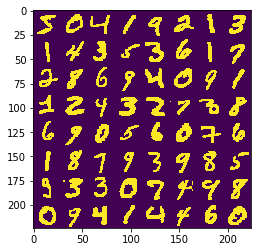

In [6]:
image = tf_lib.utils.visualize_images(train_data[0][:64] * 255)
plt.imshow(image)

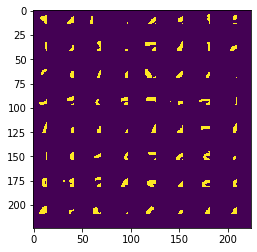

In [8]:
quadrants = cvae_trainer.quadrant_tl(train_data[0][:64]) * 255
quadrants = tf_lib.utils.visualize_images(quadrants)
plt.imshow(quadrants)

In [9]:
model = {
    'prior_net': models.PriorNetwork(hparams),
    'posterior_net': models.PosteriorNetwork(hparams),
    'generator_net': models.GenerationNetwork(hparams),
}

W0818 17:25:01.179708 4484036032 deprecation.py:506] From /Users/laetitia/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
session = tf.Session()
trainer = cvae_trainer.CVAE(session, model, hparams, tf_lib.loaders.load_mnist, lambda d: cvae_trainer.quadrant_tl(d[0]))

[*] Created dataset: train: 60000 (60000.0 labeled), val: 10000, test: 10000


W0818 17:25:38.966485 4484036032 deprecation.py:323] From /Users/laetitia/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
trainer.train()

W0818 17:25:46.093322 4484036032 deprecation_wrapper.py:119] From /Users/laetitia/workspace/CVAE/tf_lib/trainer.py:54: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.

W0818 17:25:46.669471 4484036032 deprecation_wrapper.py:119] From /Users/laetitia/workspace/CVAE/tf_lib/trainer.py:111: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W0818 17:25:46.680350 4484036032 deprecation_wrapper.py:119] From /Users/laetitia/workspace/CVAE/tf_lib/trainer.py:112: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.

  0%|          | 0/938 [00:00<?, ?it/s]

 [*] Reading checkpoints from logs/test_quadrant
Loading and saving variables ... 
---------
Variables: name (type shape) [size]
---------
prior_network/dense/kernel:0 (float32 784x1000) [784000, bytes: 3136000]
prior_network/dense/bias:0 (float32 1000) [1000, bytes: 4000]
prior_network/dense_1/kernel:0 (float32 1000x1000) [1000000, bytes: 4000000]
prior_network/dense_1/bias:0 (float32 1000) [1000, bytes: 4000]
prior_network/dense_2/kernel:0 (float32 1000x200) [200000, bytes: 800000]
prior_network/dense_2/bias:0 (float32 200) [200, bytes: 800]
prior_network/dense_3/kernel:0 (float32 1000x200) [200000, bytes: 800000]
prior_network/dense_3/bias:0 (float32 200) [200, bytes: 800]
posterior_network/dense_4/kernel:0 (float32 1568x1000) [1568000, bytes: 6272000]
posterior_network/dense_4/bias:0 (float32 1000) [1000, bytes: 4000]
posterior_network/dense_5/kernel:0 (float32 1000x1000) [1000000, bytes: 4000000]
posterior_network/dense_5/bias:0 (float32 1000) [1000, bytes: 4000]
posterior_network

100%|██████████| 938/938 [00:31<00:00, 29.91it/s, kl=11.7, loss=90.3, nll=78.6]


[*] Epoch 1/20 completed


  0%|          | 4/938 [00:00<00:31, 29.20it/s, kl=13.8, loss=91.9, nll=78.1]

[*] Evaluated Loss:91.08694594073448, KL:12.90184539746327, NLL: 78.18510082269171
[*] Posterior Mu 0.004256922751665115, Logv -0.7117611169815063
[*] Prior Mu 0.005727725103497505, Logv -0.5930813550949097


100%|██████████| 938/938 [00:35<00:00, 26.61it/s, kl=13.5, loss=84.5, nll=71]  


[*] Epoch 2/20 completed


  1%|          | 5/938 [00:00<00:32, 28.36it/s, kl=14.7, loss=78.7, nll=64]  

[*] Evaluated Loss:78.03588735981351, KL:13.379686203731852, NLL: 64.65620111356115
[*] Posterior Mu -0.0026981609407812357, Logv -1.001844882965088
[*] Prior Mu 0.00790631864219904, Logv -0.8610973358154297


100%|██████████| 938/938 [00:34<00:00, 26.96it/s, kl=14.3, loss=72.3, nll=57.9]


[*] Epoch 3/20 completed


  1%|          | 5/938 [00:00<00:33, 27.61it/s, kl=14.5, loss=71, nll=56.5]  

[*] Evaluated Loss:70.59638041599541, KL:14.518420832931616, NLL: 56.07795934008944
[*] Posterior Mu 0.0022091595456004143, Logv -1.272233486175537
[*] Prior Mu 0.00015083588368725032, Logv -1.1292519569396973


100%|██████████| 938/938 [00:34<00:00, 27.57it/s, kl=15.1, loss=62.4, nll=47.3]


[*] Epoch 4/20 completed


  1%|          | 5/938 [00:00<00:30, 30.62it/s, kl=14.1, loss=56.7, nll=42.6]

[*] Evaluated Loss:66.85434732619365, KL:15.10790640837068, NLL: 51.74644113042552
[*] Posterior Mu 0.0044497097842395306, Logv -1.4823083877563477
[*] Prior Mu -0.00039297074545174837, Logv -1.3232377767562866


100%|██████████| 938/938 [00:33<00:00, 27.68it/s, kl=16.2, loss=64.5, nll=48.2]


[*] Epoch 5/20 completed


  1%|          | 5/938 [00:00<00:33, 28.12it/s, kl=15.6, loss=63.5, nll=47.9]

[*] Evaluated Loss:65.58481629487056, KL:15.548101151824756, NLL: 50.0367153192022
[*] Posterior Mu 0.017414484173059464, Logv -1.6756097078323364
[*] Prior Mu 0.012623771093785763, Logv -1.4999890327453613


100%|██████████| 938/938 [00:38<00:00, 25.54it/s, kl=16.6, loss=65.5, nll=48.9]


[*] Epoch 6/20 completed


  0%|          | 4/938 [00:00<00:38, 24.24it/s, kl=16.5, loss=65.2, nll=48.8]

[*] Evaluated Loss:64.27704685964402, KL:15.710336691255023, NLL: 48.566709724960816
[*] Posterior Mu 0.01741687022149563, Logv -1.8414534330368042
[*] Prior Mu 0.012429890222847462, Logv -1.676824927330017


100%|██████████| 938/938 [00:35<00:00, 26.35it/s, kl=16.2, loss=65.3, nll=49]  


[*] Epoch 7/20 completed


  1%|          | 5/938 [00:00<00:34, 27.32it/s, kl=15.5, loss=59.2, nll=43.7]

[*] Evaluated Loss:63.415543671626196, KL:16.012682775023638, NLL: 47.402860726520515
[*] Posterior Mu 0.007543012499809265, Logv -1.9594132900238037
[*] Prior Mu 0.007785037625581026, Logv -1.7979955673217773


100%|██████████| 938/938 [00:35<00:00, 26.69it/s, kl=16.7, loss=61.1, nll=44.4]


[*] Epoch 8/20 completed


  0%|          | 4/938 [00:00<00:41, 22.70it/s, kl=16.3, loss=60.7, nll=44.4]

[*] Evaluated Loss:62.935003341383236, KL:16.10487501788291, NLL: 46.830128493582365
[*] Posterior Mu 0.012269387021660805, Logv -2.1080446243286133
[*] Prior Mu 0.010036936029791832, Logv -1.9242579936981201


100%|██████████| 938/938 [00:35<00:00, 26.08it/s, kl=16.2, loss=64.2, nll=47.9]


[*] Epoch 9/20 completed


  1%|          | 5/938 [00:00<00:33, 28.19it/s, kl=15.8, loss=55.1, nll=39.3]

[*] Evaluated Loss:62.30296605104094, KL:16.332661810953905, NLL: 45.970304063930634
[*] Posterior Mu 0.002246853429824114, Logv -2.186336040496826
[*] Prior Mu 0.0021629224065691233, Logv -2.0351407527923584


100%|██████████| 938/938 [00:34<00:00, 25.00it/s, kl=16.7, loss=63.7, nll=47]  


[*] Epoch 10/20 completed


  1%|          | 5/938 [00:00<00:33, 27.45it/s, kl=15.6, loss=57.7, nll=42.2]

[*] Evaluated Loss:62.282652375045096, KL:16.306223377300675, NLL: 45.97642922857005
[*] Posterior Mu 0.010457117110490799, Logv -2.329148530960083
[*] Prior Mu 0.0030738753266632557, Logv -2.153029203414917


100%|██████████| 938/938 [00:33<00:00, 27.65it/s, kl=17.6, loss=64.4, nll=46.8]


[*] Epoch 11/20 completed


  1%|          | 5/938 [00:00<00:35, 26.48it/s, kl=16.3, loss=56.1, nll=39.8]

[*] Evaluated Loss:61.88320291118257, KL:17.02048256139087, NLL: 44.86272031941991
[*] Posterior Mu 0.02679147571325302, Logv -2.4104316234588623
[*] Prior Mu 0.010527770966291428, Logv -2.2377572059631348


100%|██████████| 938/938 [00:37<00:00, 25.11it/s, kl=18.8, loss=67.5, nll=48.7]


[*] Epoch 12/20 completed


  1%|          | 5/938 [00:00<00:35, 26.50it/s, kl=16.3, loss=52.3, nll=36]  

[*] Evaluated Loss:61.41457099671577, KL:16.851339121533048, NLL: 44.56323196022374
[*] Posterior Mu 0.013603129424154758, Logv -2.531996965408325
[*] Prior Mu 0.011295126751065254, Logv -2.3642101287841797


100%|██████████| 938/938 [00:38<00:00, 26.68it/s, kl=16, loss=55.6, nll=39.6]  


[*] Epoch 13/20 completed


  1%|          | 5/938 [00:00<00:32, 28.78it/s, kl=15.9, loss=53.7, nll=37.8]

[*] Evaluated Loss:61.4908758515765, KL:16.958470247353716, NLL: 44.53240568318944
[*] Posterior Mu -0.0016011956613510847, Logv -2.5840232372283936
[*] Prior Mu 0.002739598508924246, Logv -2.4205188751220703


100%|██████████| 938/938 [00:39<00:00, 23.58it/s, kl=15.8, loss=53.3, nll=37.5]


[*] Epoch 14/20 completed


  1%|          | 5/938 [00:00<00:35, 26.02it/s, kl=15.6, loss=50.7, nll=35.1]

[*] Evaluated Loss:61.39685867698329, KL:16.963009008176765, NLL: 44.43384955339371
[*] Posterior Mu 0.01087501272559166, Logv -2.5936670303344727
[*] Prior Mu 0.011322512291371822, Logv -2.456517219543457


100%|██████████| 938/938 [00:37<00:00, 24.76it/s, kl=15.7, loss=54, nll=38.3]  


[*] Epoch 15/20 completed


  0%|          | 4/938 [00:00<00:37, 24.60it/s, kl=15.5, loss=53.4, nll=37.9]

[*] Evaluated Loss:61.12133414882004, KL:16.86524574619949, NLL: 44.25608852410772
[*] Posterior Mu -0.0058570909313857555, Logv -2.651052236557007
[*] Prior Mu -0.006027914118021727, Logv -2.494235038757324


100%|██████████| 938/938 [00:36<00:00, 25.42it/s, kl=17.7, loss=61.1, nll=43.4]


[*] Epoch 16/20 completed


  1%|          | 5/938 [00:00<00:32, 28.68it/s, kl=15.8, loss=54.3, nll=38.5]

[*] Evaluated Loss:61.22611984933258, KL:17.17064782768298, NLL: 44.05547238003676
[*] Posterior Mu 0.010198052041232586, Logv -2.8039519786834717
[*] Prior Mu 0.007529934868216515, Logv -2.6253185272216797


100%|██████████| 938/938 [00:33<00:00, 28.03it/s, kl=15.3, loss=48.8, nll=33.6]


[*] Epoch 17/20 completed


  1%|          | 5/938 [00:00<00:32, 28.86it/s, kl=16.7, loss=55.5, nll=38.8]

[*] Evaluated Loss:61.642721990111525, KL:17.5855652875961, NLL: 44.0571568968949
[*] Posterior Mu -0.000993459252640605, Logv -2.8412675857543945
[*] Prior Mu 0.007069308776408434, Logv -2.658137798309326


100%|██████████| 938/938 [00:35<00:00, 26.76it/s, kl=17, loss=54.5, nll=37.5]  


[*] Epoch 18/20 completed


  0%|          | 4/938 [00:00<00:37, 24.69it/s, kl=15.6, loss=50.9, nll=35.3]

[*] Evaluated Loss:61.239743858386, KL:17.39333049506898, NLL: 43.84641353339906
[*] Posterior Mu 0.005622320342808962, Logv -2.830423593521118
[*] Prior Mu -0.0005867776926606894, Logv -2.6820318698883057


100%|██████████| 938/938 [00:37<00:00, 24.72it/s, kl=16.2, loss=56.1, nll=39.9]


[*] Epoch 19/20 completed


  1%|          | 5/938 [00:00<00:35, 26.09it/s, kl=17, loss=51, nll=33.9]    

[*] Evaluated Loss:61.38818218449878, KL:17.651186736526004, NLL: 43.73699530826253
[*] Posterior Mu 0.003837413853034377, Logv -2.901355266571045
[*] Prior Mu 0.004327946808189154, Logv -2.7314155101776123


100%|██████████| 938/938 [00:37<00:00, 28.03it/s, kl=14.8, loss=47.5, nll=32.7]


[*] Epoch 20/20 completed
[*] Evaluated Loss:61.42474795298971, KL:17.6686346576472, NLL: 43.75611323459893
[*] Posterior Mu -0.0013723575975745916, Logv -2.9689409732818604
[*] Prior Mu -0.0004366582725197077, Logv -2.8088366985321045
Experiment name test_quadrant
[*] Saved model in logs/test_quadrant


In [ ]:
conditions = cvae_trainer.quadrant_tl(test_data[0][:10])
image_condition = tf_lib.utils.visualize_images(conditions * 255)
plt.imshow(image_condition)

In [ ]:
conditions = np.concatenate([conditions for i in range(10)], axis=0)
logits = trainer.generate_samples(conditions) * 255
image = tf_lib.utils.visualize_images(logits)
plt.imshow(image)